In [28]:
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True' #This is needed in my Anaconda+MacOsX installation; leave it commented.
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

In [29]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)


X_train shape: (60000, 784)
X_test shape: (10000, 784)

an example of a data point with label 4


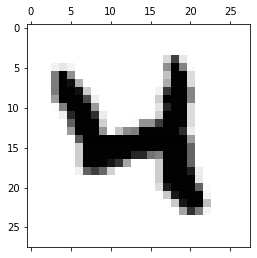

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [30]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

In [31]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [32]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [33]:
# training parameters
batch_size = 32
epochs = 15

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/15
1875/1875 [==============================] - 20s 10ms/step - loss: 0.7422 - acc: 0.7820 - val_loss: 0.3114 - val_acc: 0.9152
Epoch 2/15
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3860 - acc: 0.8905 - val_loss: 0.2396 - val_acc: 0.9314
Epoch 3/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3090 - acc: 0.9118 - val_loss: 0.1985 - val_acc: 0.9416
Epoch 4/15
1875/1875 [==============================] - 23s 13ms/step - loss: 0.2616 - acc: 0.9267 - val_loss: 0.1729 - val_acc: 0.9493
Epoch 5/15
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2320 - acc: 0.9349 - val_loss: 0.1559 - val_acc: 0.9542
Epoch 6/15
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2059 - acc: 0.9417 - val_loss: 0.1398 - val_acc: 0.9581
Epoch 7/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1866 - acc: 0.9469 - val_loss: 0.1274 - val_acc: 0.9605
Epoch 8/15
1875/1875 [============================

313/313 [==============================] - 2s 7ms/step - loss: 0.0856 - acc: 0.9731

Test loss: 0.08562082797288895
Test accuracy: 0.9731000065803528


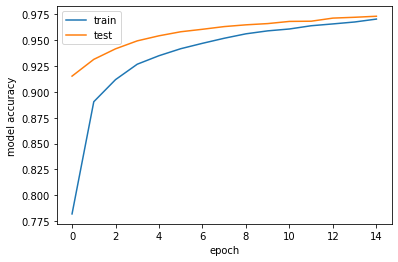

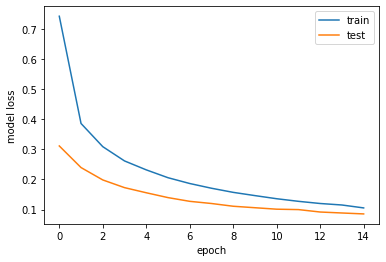

In [34]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

313/313 [==============================] - 2s 7ms/step


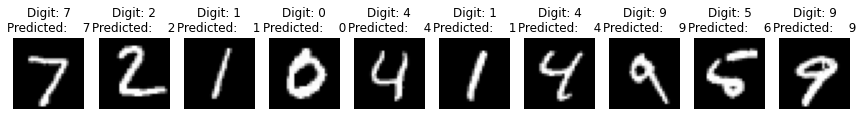

In [35]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

## Ex 12.2

In [41]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [47]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None))
    model.add(Conv2D(10, kernel_size=(2,2), 
                     activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))

    #
    # ADD HERE SOME OTHER LAYERS AT YOUR WILL, FOR EXAMPLE SOME: Dropout, 2D pooling, 2D convolutional etc. ... 
    # remember to move towards a standard flat layer in the final part of your DNN,
    # and that we need a soft-max layer with num_classes=10 possible outputs
    #
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['acc'])
    return model

In [48]:
# training parameters
batch_size = 32
epochs = 15

# create the deep conv net
model_CNN=create_CNN()

# train CNN
model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/15
1875/1875 [==============================] - 37s 19ms/step - loss: 0.4941 - acc: 0.8470 - val_loss: 0.1753 - val_acc: 0.9497
Epoch 2/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1485 - acc: 0.9567 - val_loss: 0.1104 - val_acc: 0.9662
Epoch 3/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1066 - acc: 0.9682 - val_loss: 0.0821 - val_acc: 0.9754
Epoch 4/15
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0887 - acc: 0.9736 - val_loss: 0.0680 - val_acc: 0.9795
Epoch 5/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0778 - acc: 0.9766 - val_loss: 0.0632 - val_acc: 0.9811
Epoch 6/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0703 - acc: 0.9791 - val_loss: 0.0576 - val_acc: 0.9806
Epoch 7/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0640 - acc: 0.9808 - val_loss: 0.0538 - val_acc: 0.9833
Epoch 8/15
1875/1875 [==========================

In [ ]:
predictions = model_CNN.predict(X_test)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()